In [1]:
%pip install tensorflow
                           

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 5.9 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 503.9 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install transformers

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 5.9 MB/s eta 0:00:0000:01m00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertModel, BertConfig
import torch
import re
import os
from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler

In [3]:
#set GPUS
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'


In [4]:
MAX_LENS = 200
Batch_size = 16
learning_rate = 5e-5
number_epoch = 5


In [5]:
#build bert model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [6]:
#construct bert model

class bert_model(torch.nn.Module):
    #construct class
    def __init__(self):
        super().__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.drop = torch.nn.Dropout(0.3)
        self.out = torch.nn.Linear(768,11)
    
    def forward(self, ids, mask, token_type_ids):
        unw, out = self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        #add drop layer
        drop_out = self.drop(out)
        #final layer
        out_final = self.out(drop_out)
        return out_final
    

model_bert = bert_model()
model_bert.to(device)




        
        

bert_model(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [7]:
#get my current path
current_path = os.getcwd()
print(current_path)
file_path_chapter_four = '/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_hsien.csv'

/Users/wangxuechun/unsw/thesis-repo/jupyter_notebook


In [8]:
#load my dataset
df_chapter_four = pd.read_csv(file_path_chapter_four)
df_chapter_four.head()


,English_Verse_chap4_hsien
0,There are said to be some victors who take no ...
1,"Look at Ah Q, light and elated, as if about to..."
2,This victory was not without strange consequen...
3,"""Ah Q, may you die sonless!"""
4,"These words sounded again in Ah Q's ears, and ..."


In [7]:
#test function
def test():
    model_bert.eval()
    bert_outputs = []

    with torch.no_grad():
        for unw, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model_bert(ids, mask, token_type_ids)

            bert_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return bert_outputs


In [8]:
#construct my data frame
class DatasetParagraphs(Dataset):
    #intialize function
    def __init__ (self, dataset, tokenizer, max_lens):
        self.tokenizer = tokenizer 
        self.dataset = dataset
        self.tweet = dataset['tweets']
        self.targets = self.dataset.list
        self.max_lens = max_lens


    def __len__(self):
        return len(self.tweet)

    #get item
    def __getitem__(self, num):
        tweet = str(self.tweet[num])
        tweet = " ".join(tweet.split())
        inputs = self.tokenizer.encode_plus(
            tweet,
            None, 
            add_special_tokens = True,
            max_length = self.max_lens,
            pad_to_max_length = True,
            return_attention_mask = True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype= torch.long),
            'targets' : torch.tensor(self.targets[num], dtype = torch.float)
        }

    


In [44]:
#code optimization sentiment analysis
file_paths = ['/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_hsien.csv','/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_google.csv','/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_julia.csv','/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_hsien.csv', '/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_google.csv', '/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_julia.csv','/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_hsien.csv','/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_google.csv','/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_julia.csv']
suffixes = ['hsien_chapt4', 'google_chapt4', 'julia_chapt4','hsien_chapt5', 'google_chapt5', 'julia_chapt5','hsien_chapt6', 'google_chapt6', 'julia_chapt6']
df_list_count = []
file_path_new = f"/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/"
for i, suffix in zip(file_paths, suffixes):
    print(f"Processing file: {i}, with suffix: {suffix}")
    #load the dataset
    df = pd.read_csv(i)
    df_new = pd.DataFrame()
    chapter = suffix.split('_')[-1]  
    
    column_name = f"English_Verse_chap{chapter[-1]}_{suffix.split('_')[0]}" 
    df_new['tweets'] = df[column_name]
    values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df)
    df_new['list'] = values

    #customize my dataset
    dataset_new = DatasetParagraphs(df_new, tokenizer, MAX_LENS)
    param = {'batch_size' : 1,
            'shuffle' : False,
            'num_workers' : 0
    }

    test_loader = DataLoader(dataset_new, **param)
    test_outputs = test()

    #we got the test outputs values
    test_outputs = np.array(test_outputs)

    for i in range(test_outputs.shape[0]):
        for j in range(test_outputs.shape[1]):
                if test_outputs[i][j] >= 0.5:
                    test_outputs[i][j] = 1
                else:
                    test_outputs[i][j] = 0
    df_new['Optimistic'] = "None"
    df_new['Thankful'] = "None"
    df_new['Empathetic'] = "None"
    df_new['Pessimistic'] = "None"
    df_new['Anxious'] = "None"
    df_new['Sad'] = "None"
    df_new['Annoyed'] = "None"
    df_new['Denial'] = "None"
    df_new['Official report'] = "None"
    df_new['Surprise'] = "None"
    df_new['Joking'] = "None"

    for i in range(len(test_outputs)):
        df_new['Optimistic'].iloc[i] = test_outputs[i][0]
        df_new['Thankful'].iloc[i] = test_outputs[i][1]
        df_new['Empathetic'].iloc[i] = test_outputs[i][2]
        df_new['Pessimistic'].iloc[i] = test_outputs[i][3]
        df_new['Anxious'].iloc[i] = test_outputs[i][4]
        df_new['Sad'].iloc[i] = test_outputs[i][5]
        df_new['Annoyed'].iloc[i] = test_outputs[i][6]
        df_new['Denial'].iloc[i] = test_outputs[i][7]
        df_new['Official report'].iloc[i] = test_outputs[i][8]
        df_new['Surprise'].iloc[i] = test_outputs[i][9]
        df_new['Joking'].iloc[i] = test_outputs[i][10]
    
    #deep clean the dataframe
    df_new = df_new.drop(['list','Official report'], axis = 1)
    file_name_new = f"{suffix}_sentiment_prediction.csv"
    file_path_current = os.path.join(file_path_new,file_name_new)
    df_new.to_csv(file_path_current,index=False)
    df_count = pd.DataFrame()

    df_count = pd.DataFrame(index=[0], columns=['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking'])
    df_count[:] = "None"

    # Define a function to count 1.0 in columns
    def count_ones(column):
        return (df_new[column] == 1.0).sum()
    
    # Use the function to count and assign values
    df_count['Optimistic'] = count_ones('Optimistic')
    df_count['Thankful'] = count_ones('Thankful')
    df_count['Empathetic'] = count_ones('Empathetic')
    df_count['Pessimistic'] = count_ones('Pessimistic')
    df_count['Anxious'] = count_ones('Anxious')
    df_count['Sad'] = count_ones('Sad')
    df_count['Annoyed'] = count_ones('Annoyed')
    df_count['Denial'] = count_ones('Denial')
    df_count['Surprise'] = count_ones('Surprise')
    df_count['Joking'] = count_ones('Joking')

    df_list_count.append(df_count)




    
    
    
    
    

    

    

Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_hsien.csv, with suffix: hsien_chapt4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_google.csv, with suffix: google_chapt4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_julia.csv, with suffix: julia_chapt4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_hsien.csv, with suffix: hsien_chapt5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_google.csv, with suffix: google_chapt5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_julia.csv, with suffix: julia_chapt5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_hsien.csv, with suffix: hsien_chapt6


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_google.csv, with suffix: google_chapt6


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_julia.csv, with suffix: julia_chapt6


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


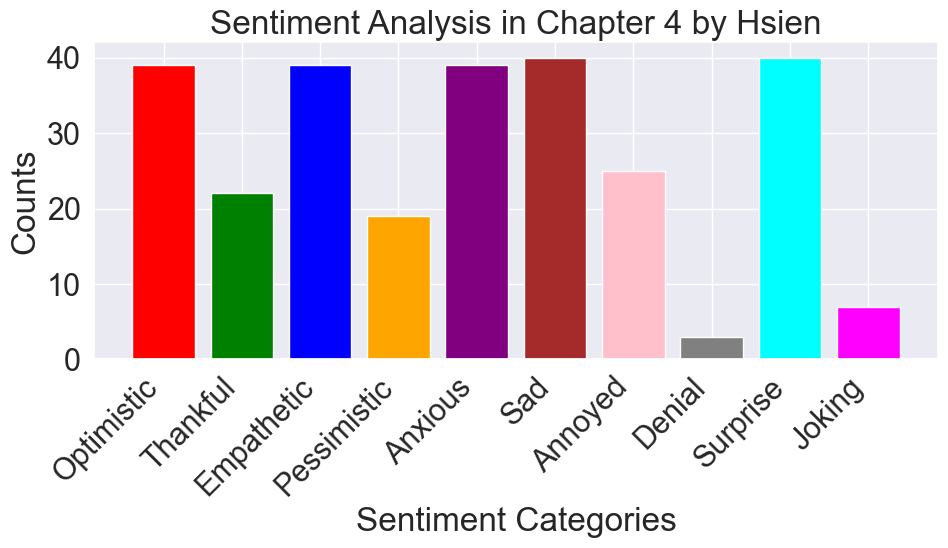

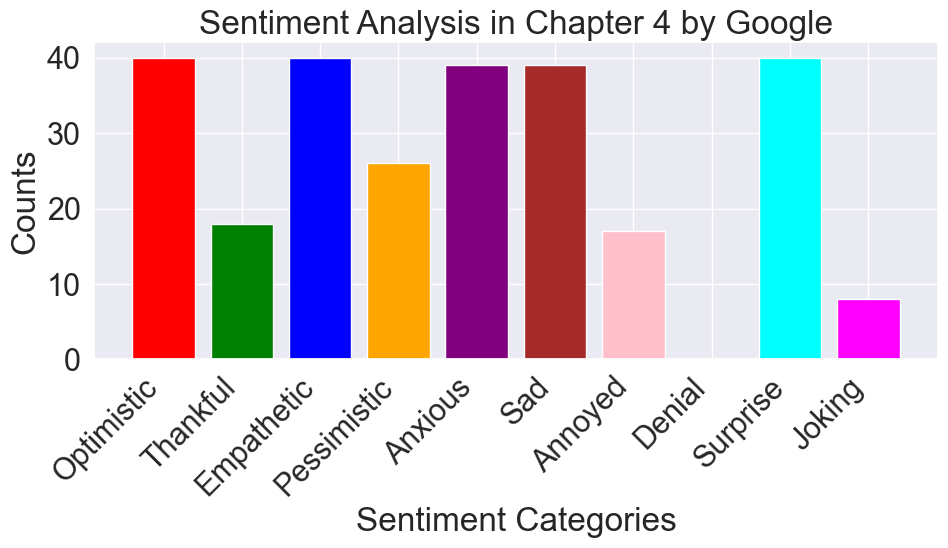

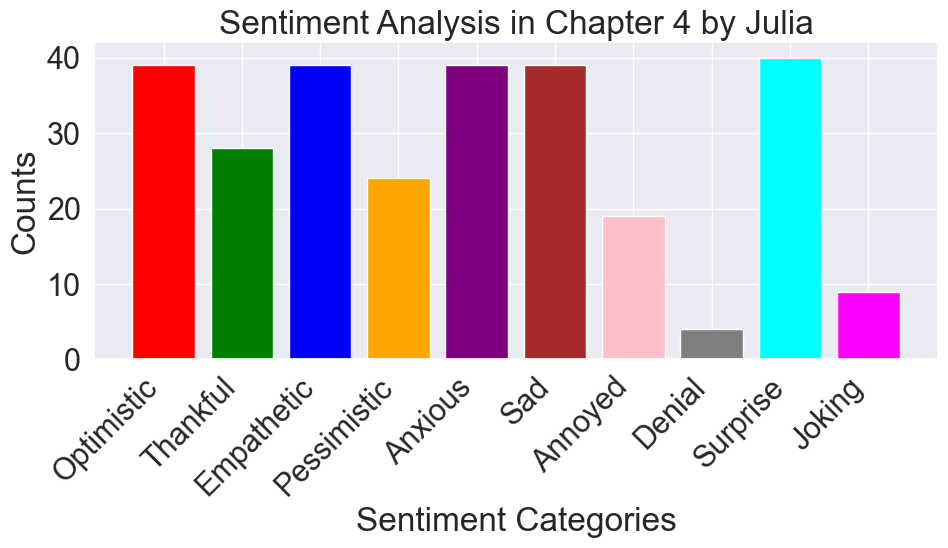

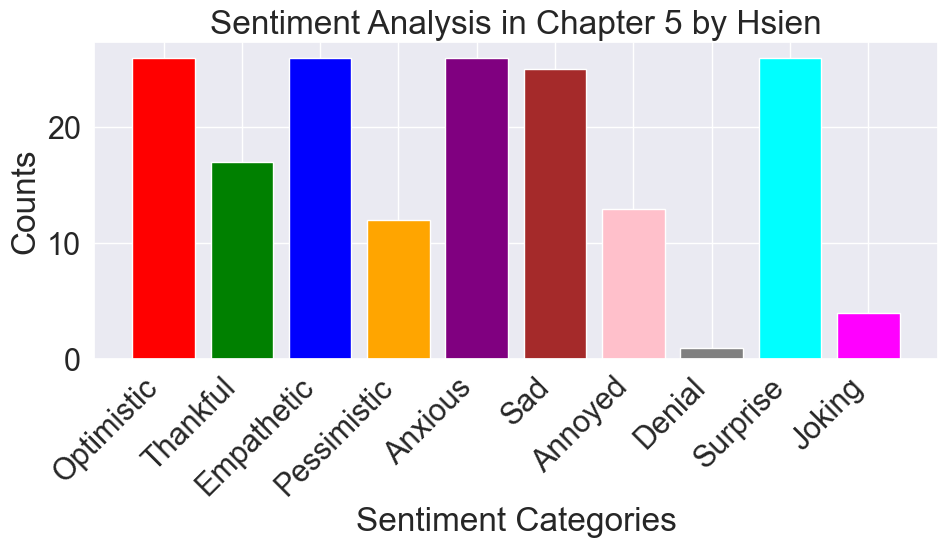

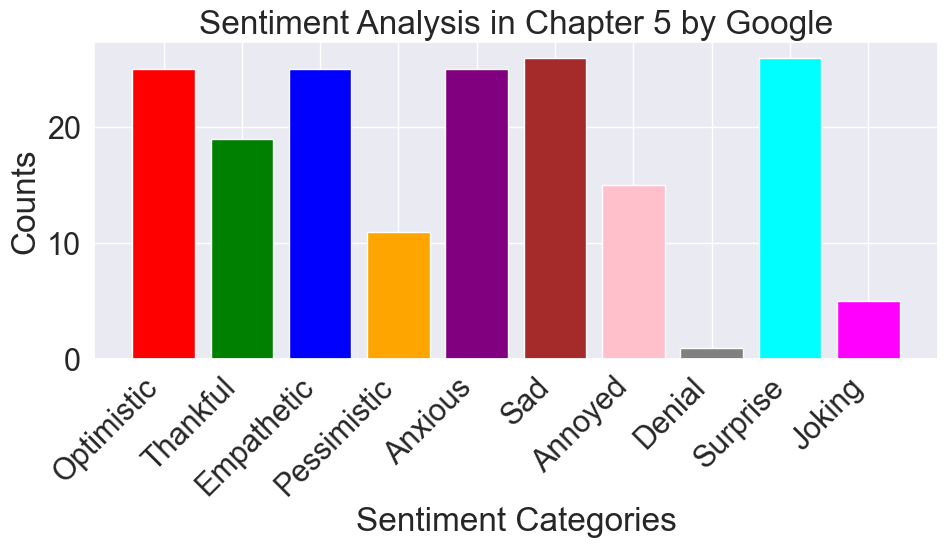

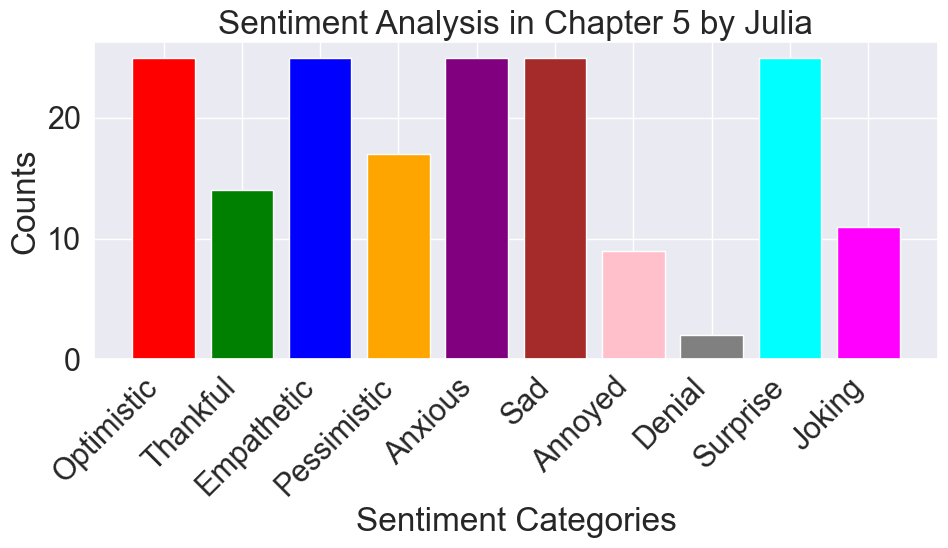

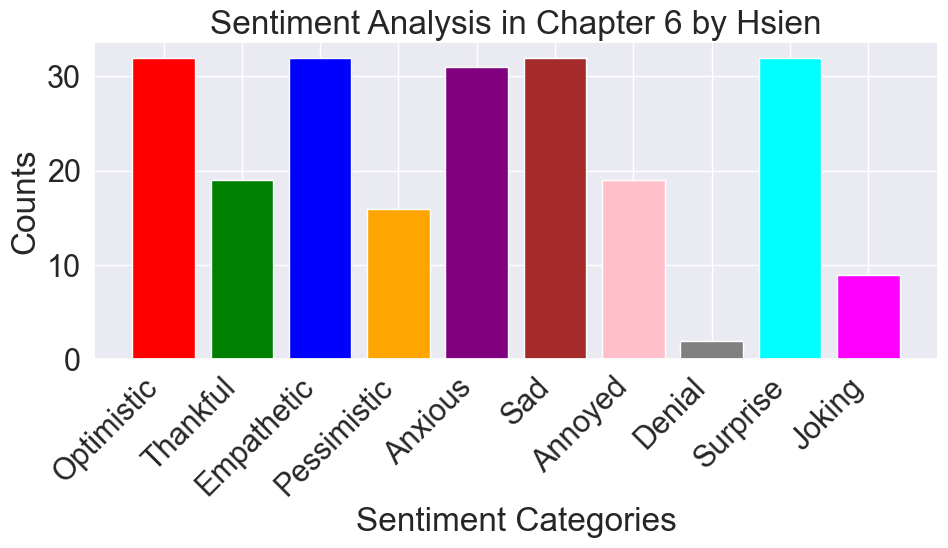

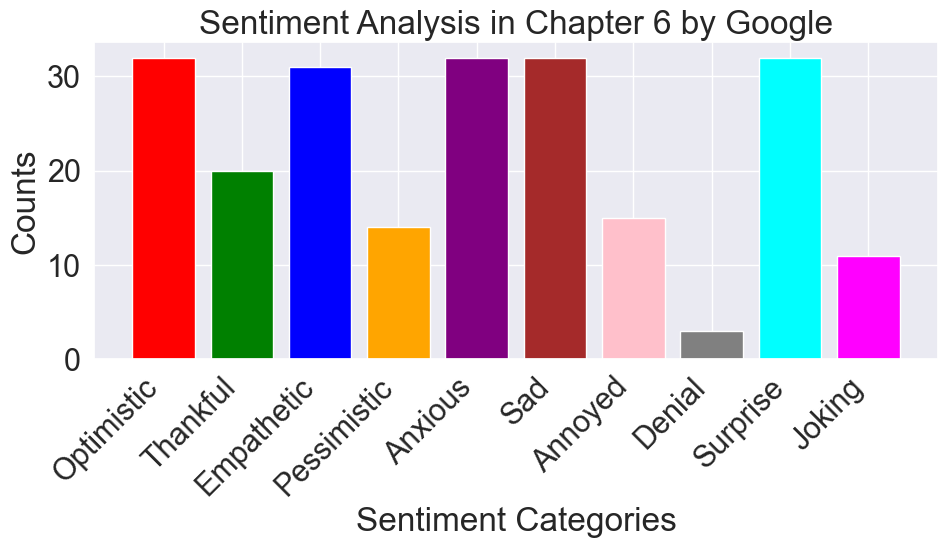

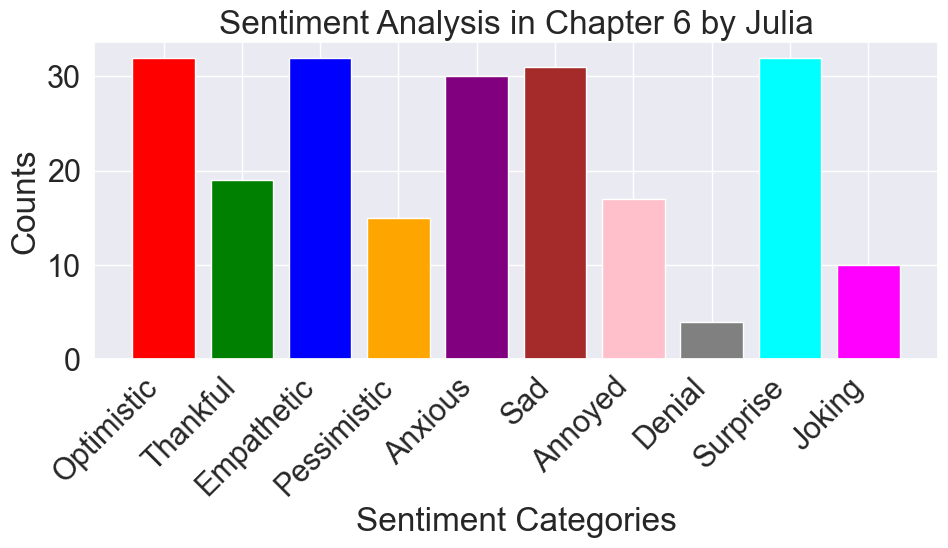

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

for df, suffix in zip(df_list_count, suffixes):
    # Convert data to numeric if not already
    df_numeric = df.apply(pd.to_numeric)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df_numeric.columns, df_numeric.iloc[0], color=colors[:len(df_numeric.columns)])
    

    author, chapter_info = suffix.split('_')[0], suffix.split('_')[1]
    chapter = 'Chapter ' + chapter_info[-1]  
    
    # Adding titles and labels
    plt.title(f'Sentiment Analysis in {chapter} by {author.capitalize()}')
    plt.xlabel('Sentiment Categories')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    #file_path = '/Users/wangxuechun/unsw/UNSW-Thesis-/plots_for_sentiment_analysis/'

    #filename = f"{file_path}/{author}_{chapter_info}.png"  
    #plt.savefig(filename, format='png', dpi=300)  
    plt.show()
  



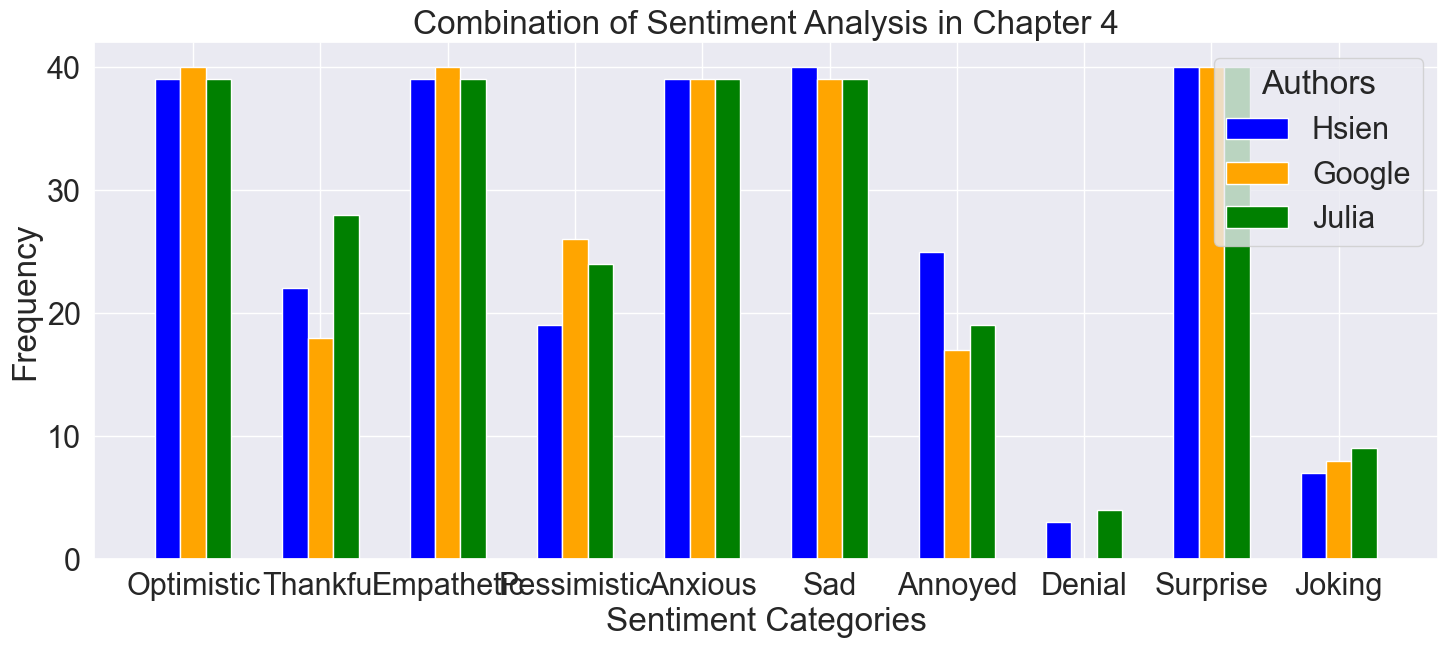

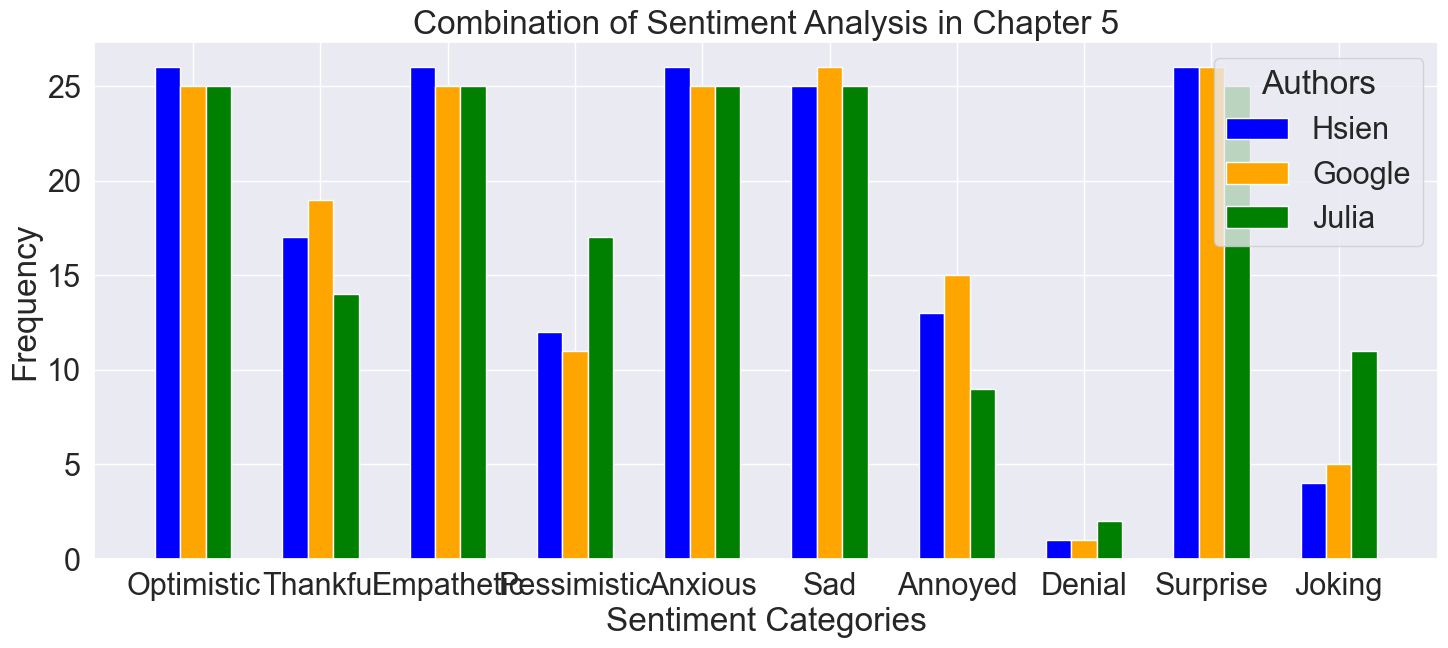

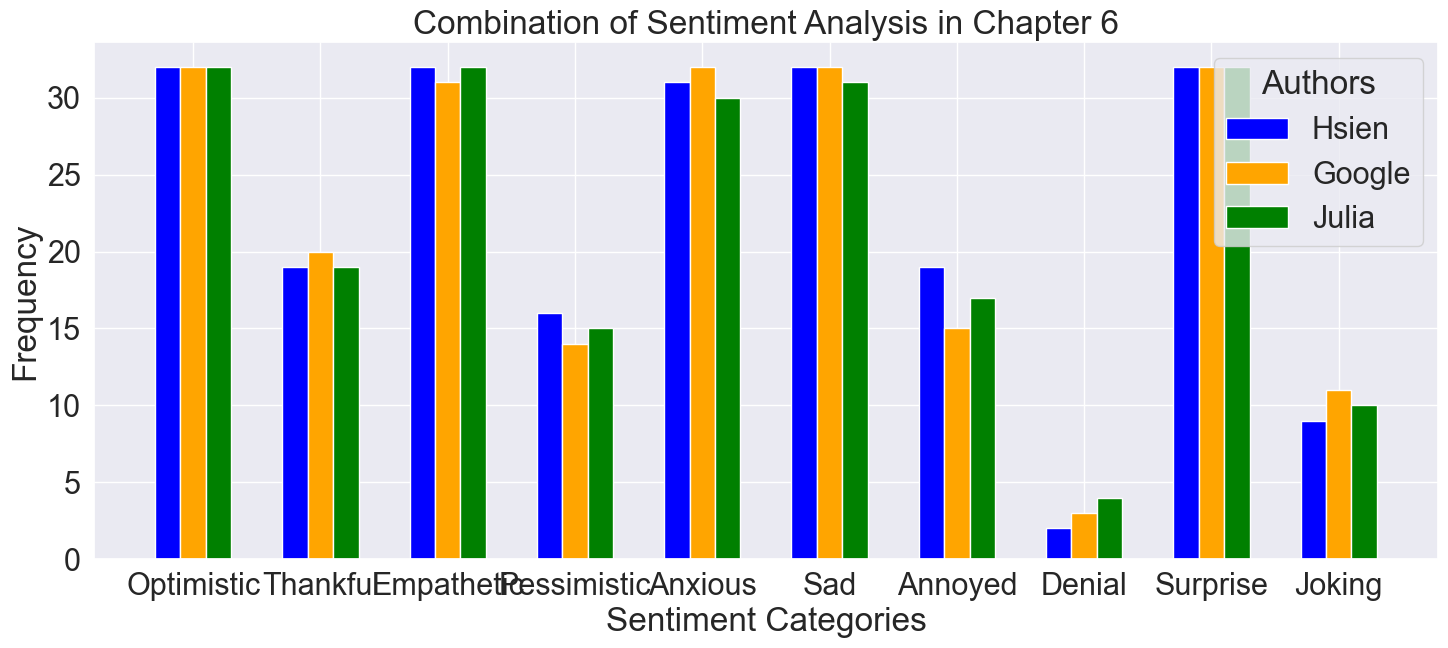

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

counts_chapt4 = {suffix: df for df, suffix in zip(df_list_count, suffixes) if 'chapt4' in suffix}
counts_chapt5 = {suffix: df for df, suffix in zip(df_list_count, suffixes) if 'chapt5' in suffix}
counts_chapt6 = {suffix: df for df, suffix in zip(df_list_count, suffixes) if 'chapt6' in suffix}


# Define colors for each author
colors = ['blue', 'orange', 'green']

def plot_grouped_bar(counts_dict, chapter_num):
    num_categories = len(counts_dict[next(iter(counts_dict))].columns)
    
    bar_positions = np.arange(num_categories)
    bar_width = 0.2
    
    plt.figure(figsize=(15, 7))
    
    for i, (author_suffix, df) in enumerate(counts_dict.items()):
        # Convert data to numeric if not already
        df_numeric = df.apply(pd.to_numeric).iloc[0]
        # Plot
        plt.bar(bar_positions + i * bar_width, df_numeric.values, width=bar_width, color=colors[i], label=author_suffix.split('_')[0].capitalize())

    # Set the position and labels for the x-axis ticks
    plt.xticks(bar_positions + bar_width*(len(counts_dict)/2 - 0.5), counts_dict[next(iter(counts_dict))].columns)
    
    # Adding titles and labels
    plt.title(f'Combination of Sentiment Analysis in Chapter {chapter_num}')
    plt.xlabel('Sentiment Categories')
    plt.ylabel('Frequency')
    plt.legend(title="Authors")
    
    plt.tight_layout()

    #file_path = '/Users/wangxuechun/unsw/UNSW-Thesis-/plots_for_sentiment_analysis/'
    #filename = f"{file_path}chapter_{chapter_num}_combination.png"  
    #plt.savefig(filename, format='png', dpi=300)  
    plt.show()
    plt.close()  # Close the plot to free up memory

# Plot for Chapter 4
plot_grouped_bar(counts_chapt4, 4)

# Plot for Chapter 5
plot_grouped_bar(counts_chapt5, 5)

#Plot for Chapter 6 
plot_grouped_bar(counts_chapt6, 6)





<Axes: >

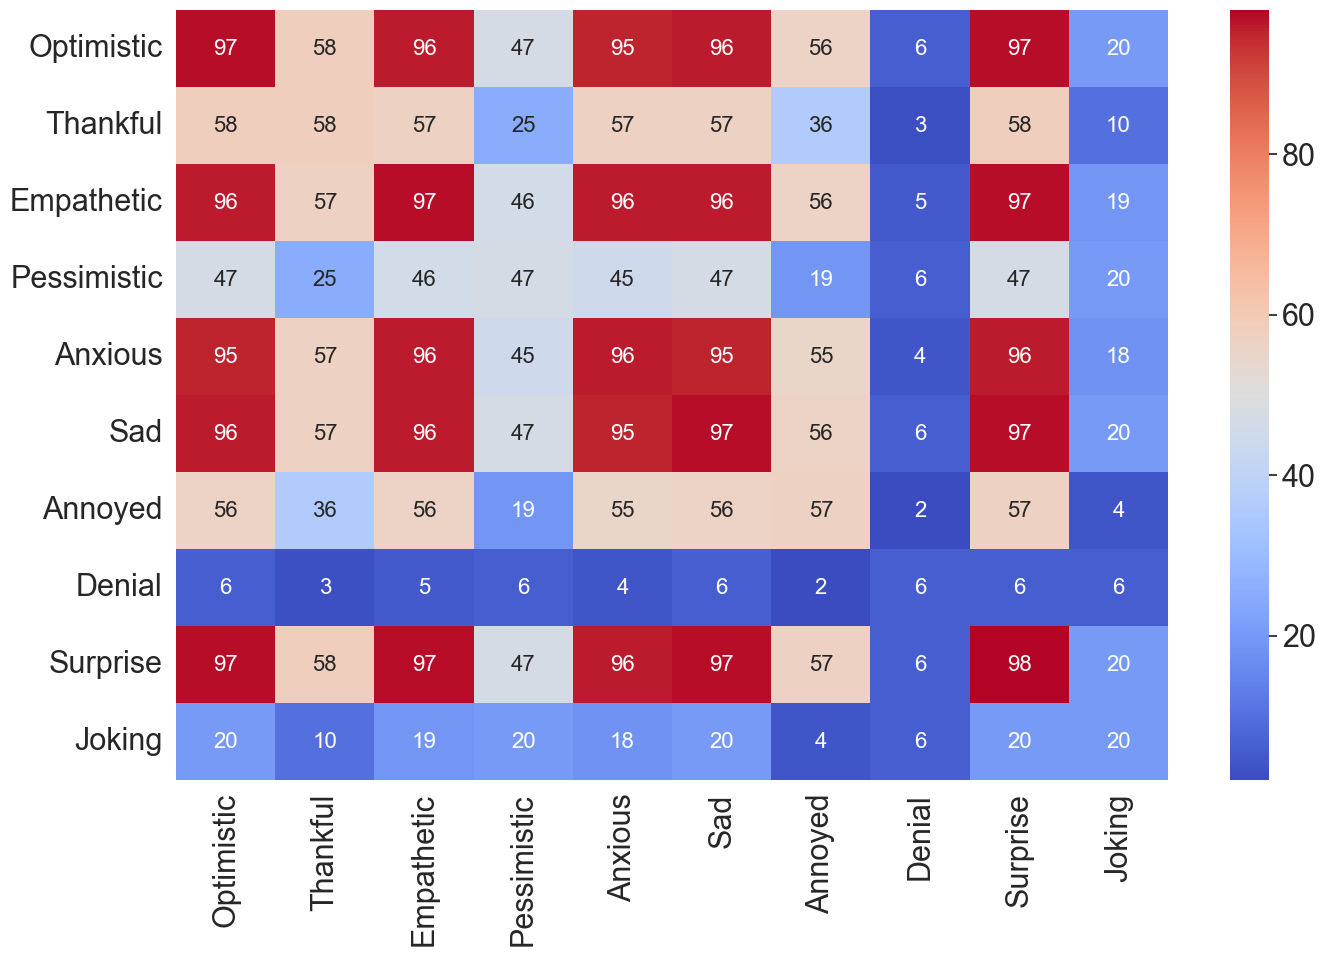

In [56]:
df_chapt4_list_hsien = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/hsien_chapt4_sentiment_prediction.csv')
df_chapt5_list_hsien = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/hsien_chapt5_sentiment_prediction.csv')
df_chapt6_list_hsien = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/hsien_chapt6_sentiment_prediction.csv')

df_hsien_total = pd.concat([df_chapt4_list_hsien,df_chapt5_list_hsien,df_chapt6_list_hsien], ignore_index=True)

df_hsien_total = df_hsien_total.drop(['tweets'], axis=1)

emote_array = np.zeros((10, 10))

for i in range(len(df_hsien_total)):
    l = df_hsien_total.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1.0:
            emote_array[j][j] += 1
        for k in range(j+1, 10):                 # to avoid double counting.
            if (l[j] == 1.0) and (l[k] == 1.0):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

emotions = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking']

emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

fig = plt.figure(figsize = (16, 10))
sns.set(font_scale=2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16})







<Axes: >

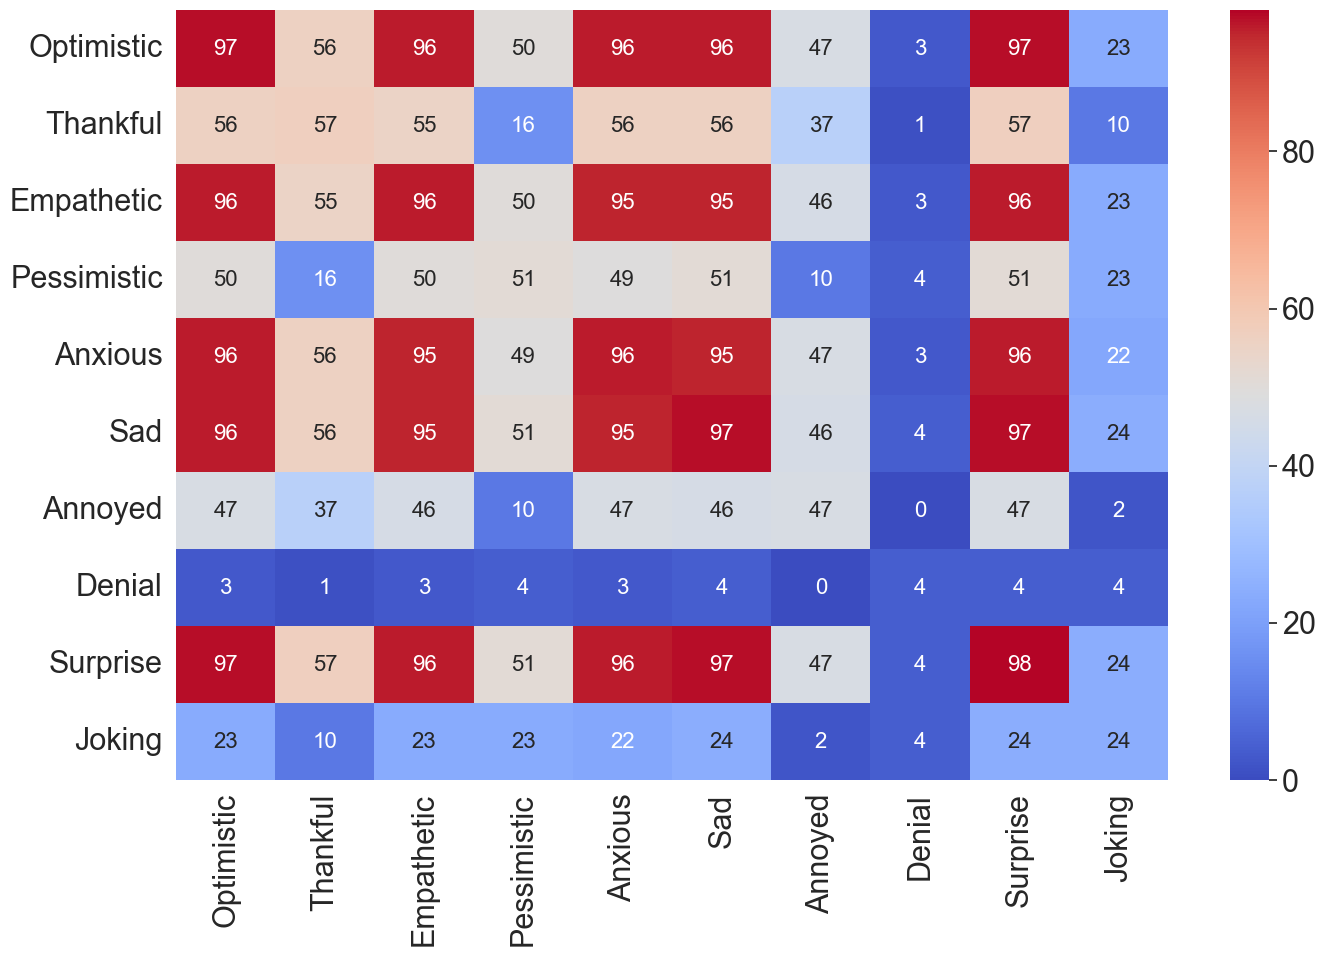

In [58]:
df_chapt4_list_google = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/google_chapt4_sentiment_prediction.csv')
df_chapt5_list_google = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/google_chapt5_sentiment_prediction.csv')
df_chapt6_list_google = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/google_chapt6_sentiment_prediction.csv')

df_google_total = pd.concat([df_chapt4_list_google,df_chapt5_list_google,df_chapt6_list_google], ignore_index=True)

df_google_total = df_google_total.drop(['tweets'], axis=1)

array_google = np.zeros((10, 10))

for i in range(len(df_google_total)):
    l = df_google_total.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1.0:
            array_google[j][j] += 1
        for k in range(j+1, 10):                 # to avoid double counting.
            if (l[j] == 1.0) and (l[k] == 1.0):
                array_google[j][k] += int(1)
                array_google[k][j] += int(1)

emotions = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking']

emote_df_google = pd.DataFrame(array_google, columns = emotions)
for col in emote_df_google:
    emote_df_google[col] = emote_df_google[col].astype(int)

fig = plt.figure(figsize = (16, 10))
sns.set(font_scale=2)
sns.heatmap(emote_df_google, annot = True, cmap = 'coolwarm', xticklabels = emote_df_google.columns, yticklabels = emote_df_google.columns, 
            fmt = 'g', annot_kws = {"size" : 16})

<Axes: >

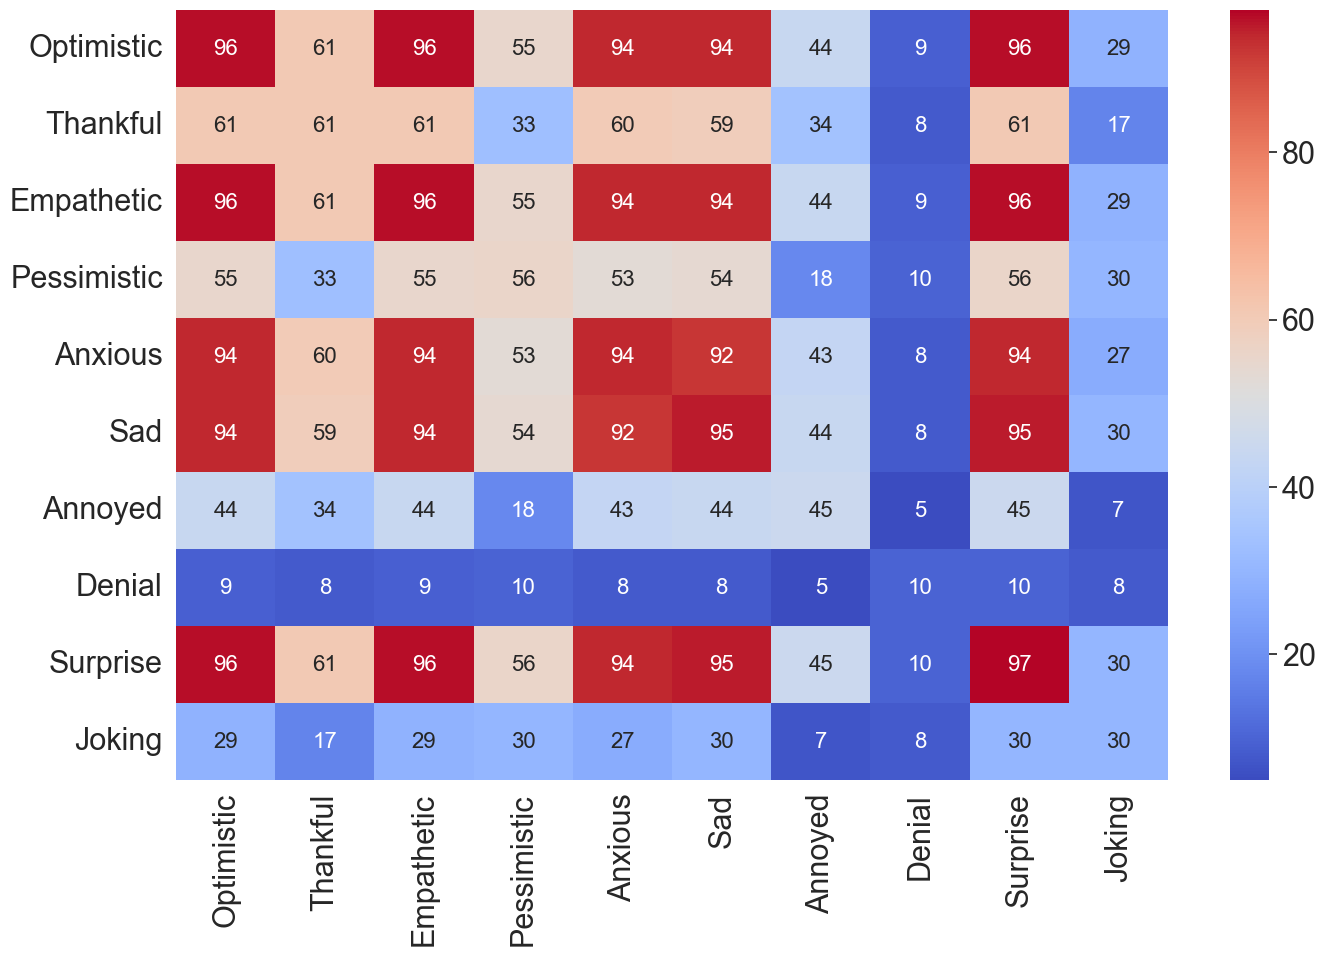

In [59]:
df_chapt4_list_julia = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/julia_chapt4_sentiment_prediction.csv')
df_chapt5_list_julia = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/julia_chapt5_sentiment_prediction.csv')
df_chapt6_list_julia = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/julia_chapt6_sentiment_prediction.csv')

df_julia_total = pd.concat([df_chapt4_list_julia,df_chapt5_list_julia,df_chapt6_list_julia], ignore_index=True)

df_julia_total = df_julia_total.drop(['tweets'], axis=1)

array_julia = np.zeros((10, 10))

for i in range(len(df_julia_total)):
    l = df_julia_total.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1.0:
            array_julia[j][j] += 1
        for k in range(j+1, 10):               
            if (l[j] == 1.0) and (l[k] == 1.0):
                array_julia[j][k] += int(1)
                array_julia[k][j] += int(1)

emotions = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking']

emote_df_julia = pd.DataFrame(array_julia, columns = emotions)
for col in emote_df_julia:
    emote_df_julia[col] = emote_df_julia[col].astype(int)

fig = plt.figure(figsize = (16, 10))
sns.set(font_scale=2)
sns.heatmap(emote_df_julia, annot = True, cmap = 'coolwarm', xticklabels = emote_df_julia.columns, yticklabels = emote_df_julia.columns, 
            fmt = 'g', annot_kws = {"size" : 16})